In [1]:
pip install ../../

Defaulting to user installation because normal site-packages is not writeable
Processing /home/mehdi/code/Straph
  Preparing metadata (setup.py) ... done
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=129923 sha256=9c10366080b381ad5cd1340fce45ec4d5f0cfc9e1b3ccd294f7a88eee368b32d
  Stored in directory: /tmp/pip-ephem-wheel-cache-ng_uapwn/wheels/37/09/70/7b86f721614374ec311fa16ed21dbb33c1959d2c6f80461dfd
Successfully built straph
    sys-platform (=="darwin") ; extra == 'objc'
                 ~^
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "latapy_test_intro_nodes_jga.sg",
                      path_links=path_directory + "latapy_test_intro_links_jga.sg")
S.describe()

/home/mehdi/.sage/local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Nb of Nodes :  5
Nb of segmented nodes :  11.0
Nb of links :  6
Nb of segmented links :  16.0
Nb of event times :  30


<Axes: xlabel='t', ylabel='Nodes'>

findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond'

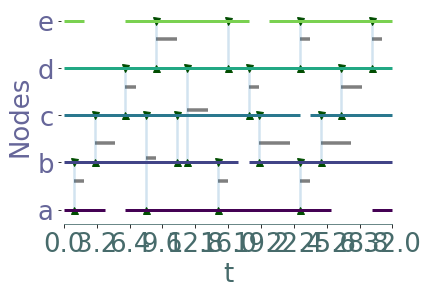

In [2]:
S.plot()

In [3]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
S.sg_to_streamfig("stream_example_jga","eps")
nouveau = S.fragmented_stream_graph()

In [4]:
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [5]:
events, events_reverse = bt.events_dic(nouveau)

In [6]:
link_ind = bt.link_index(nouveau)
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [35]:
neighbors[3]

{4: {(9.0, (9.0, 9.0)),
  (11.0, (9.0, 11.0)),
  (16.0, (16.0, 16.0)),
  (23.0, (23.0, 23.0)),
  (24.0, (23.0, 24.0)),
  (30.0, (30.0, 30.0)),
  (31.0, (30.0, 31.0))}}

In [7]:
node = 0

In [8]:
pre, cur_best = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)
cur_b_arr = bt. cur_best_to_array(nouveau, cur_best, events, events_reverse)

In [16]:
S.node_to_label

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e'}

In [19]:
pre[4]

{0.0: {},
 1.0: {},
 2.0: {},
 3.0: {},
 4.0: {},
 5.0: {},
 6.0: {},
 7.0: {},
 8.0: {},
 9.0: {(3, 6.0): (9.0, 9.0), (3, 7.0): (9.0, 9.0)},
 11.0: {(3, 6.0): (9.0, 11.0), (3, 7.0): (9.0, 11.0)},
 12.0: {},
 14.0: {},
 15.0: {},
 16.0: {(3, 12.0): (16.0, 16.0), (3, 14.0): (16.0, 16.0)},
 17.0: {},
 18.0: {},
 19.0: {},
 20.0: {},
 22.0: {},
 23.0: {(3, 18.0): (23.0, 23.0), (3, 19.0): (23.0, 23.0)},
 24.0: {(3, 18.0): (23.0, 24.0), (3, 19.0): (23.0, 24.0)},
 25.0: {},
 26.0: {},
 27.0: {},
 28.0: {},
 29.0: {},
 30.0: {(3, 27.0): (30.0, 30.0),
  (3, 28.0): (30.0, 30.0),
  (3, 29.0): (30.0, 30.0)},
 31.0: {(3, 27.0): (30.0, 31.0),
  (3, 28.0): (30.0, 31.0),
  (3, 29.0): (30.0, 31.0)},
 32.0: {}}

In [18]:
cur_best[4]

{0.0: (-inf, inf),
 1.0: (-inf, inf),
 2.0: (-inf, inf),
 3.0: (-inf, inf),
 4.0: (-inf, inf),
 5.0: (-inf, inf),
 6.0: (-inf, inf),
 7.0: (-inf, inf),
 8.0: (-inf, inf),
 9.0: (2.0, 4),
 11.0: (2.0, 4),
 12.0: (-inf, inf),
 14.0: (-inf, inf),
 15.0: (-inf, inf),
 16.0: (2.0, 3),
 17.0: (-inf, inf),
 18.0: (-inf, inf),
 19.0: (-inf, inf),
 20.0: (-inf, inf),
 22.0: (-inf, inf),
 23.0: (9.0, 3),
 24.0: (9.0, 3),
 25.0: (-inf, inf),
 26.0: (-inf, inf),
 27.0: (-inf, inf),
 28.0: (-inf, inf),
 29.0: (-inf, inf),
 30.0: (24.0, 4),
 31.0: (24.0, 4),
 32.0: (-inf, inf)}

In [20]:
pre2 = bt.clem_new_algorithm(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)

In [21]:
for v in range(len(pre)):
    for t in pre[v].keys():
        if pre[v][t].keys() != pre2[v][t]:
            print("problem",pre[v][t].keys(),pre2[v][t])

problem dict_keys([(0, 0)]) set()
problem dict_keys([(0, 0)]) set()
problem dict_keys([(0, 0)]) set()
problem dict_keys([(0, 0)]) set()
problem dict_keys([(0, 0)]) set()
problem dict_keys([(0, 0)]) set()
problem dict_keys([(0, 0)]) set()
problem dict_keys([(0, 0)]) set()


In [22]:
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat_triplet, lat_rev_triplet = bt.latencies_without_0_and_rev(nouveau, lat, events)

In [36]:
lat_triplet[3]

[[2.0, 6.0, 3], [9.0, 18.0, 2], [24.0, 27.0, 3]]

In [26]:
lat[4]

[0,
 0,
 (9.0, 4),
 0,
 0,
 0,
 0,
 0,
 0,
 (23.0, 3),
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 (30.0, 4),
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [27]:
G = bt.predecessor_graph(nouveau, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)
Gp = bt.instant_graphs(G)
GT = bt.interval_graph(Gp)

In [13]:
for e in GT:
    print(e,list(GT[e].nodes()))

(9.0, 11.0) [(3, 6.0), (4, 11.0), (3, 7.0)]
(6.0, 7.0) [(2, 3.0), (3, 7.0), (2, 5.0)]
(3.0, 5.0) [(1, 2.0), (2, 5.0)]
(18.0, 19.0) [(2, 19.0), (3, 19.0)]
(23.0, 24.0) [(3, 19.0), (4, 24.0)]
(19.0, 22.0) [(1, 16.0), (2, 22.0)]
(30.0, 31.0) [(3, 27.0), (4, 31.0), (3, 28.0), (3, 29.0)]
(27.0, 28.0) [(2, 25.0), (3, 28.0), (2, 27.0), (1, 24.0), (2, 28.0)]
(28.0, 29.0) [(2, 25.0), (3, 29.0), (2, 27.0), (2, 28.0)]
(25.0, 27.0) [(1, 24.0), (2, 27.0)]
(12.0, 14.0) [(1, 11.0), (3, 14.0)]


In [14]:
GT[(15.0, 16.0)].successors((1, 14.0))

KeyError: (15.0, 16.0)

In [28]:
edge = bt.edges(nouveau)
before, after = bt.volume_instantenuous(nouveau, G, events, events_reverse,edge)
mx = bt.max_volume_superposition(GT)
print(mx)

2


In [16]:
before[1]

{0.0: False,
 1.0: False,
 2.0: True,
 3.0: False,
 5.0: False,
 6.0: False,
 7.0: False,
 8.0: False,
 9.0: False,
 11.0: False,
 12.0: False,
 14.0: False,
 15.0: False,
 16.0: True,
 18.0: False,
 19.0: False,
 22.0: False,
 23.0: False,
 24.0: True,
 25.0: False,
 27.0: False,
 28.0: False,
 29.0: False,
 30.0: False,
 31.0: False,
 32.0: False}

In [17]:
after[1]

{0.0: False,
 1.0: True,
 2.0: False,
 3.0: False,
 5.0: False,
 6.0: False,
 7.0: False,
 8.0: False,
 9.0: False,
 11.0: False,
 12.0: False,
 14.0: False,
 15.0: True,
 16.0: False,
 18.0: False,
 19.0: False,
 22.0: False,
 23.0: True,
 24.0: False,
 25.0: False,
 27.0: False,
 28.0: False,
 29.0: False,
 30.0: False,
 31.0: False,
 32.0: False}

In [18]:
before[2]

{0.0: False,
 1.0: False,
 2.0: False,
 3.0: False,
 5.0: False,
 6.0: False,
 7.0: False,
 8.0: False,
 9.0: True,
 11.0: False,
 12.0: False,
 14.0: False,
 15.0: False,
 16.0: False,
 18.0: False,
 19.0: False,
 22.0: False,
 23.0: False,
 24.0: False,
 25.0: False,
 27.0: False,
 28.0: False,
 29.0: False,
 30.0: False,
 31.0: False,
 32.0: False}

In [19]:
after[2]

{0.0: False,
 1.0: False,
 2.0: False,
 3.0: False,
 5.0: False,
 6.0: False,
 7.0: False,
 8.0: True,
 9.0: False,
 11.0: False,
 12.0: False,
 14.0: False,
 15.0: False,
 16.0: False,
 18.0: False,
 19.0: False,
 22.0: False,
 23.0: False,
 24.0: False,
 25.0: False,
 27.0: False,
 28.0: False,
 29.0: False,
 30.0: False,
 31.0: False,
 32.0: False}

In [29]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)
f_edge = bt.dictionary_first_edge(G,  cur_best)
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [21]:
sigma_r

{(0, 0.0): vol(1,0),
 (0, 1.0): vol(1,0),
 (0, 2.0): vol(1,0),
 (0, 3.0): vol(1,0),
 (0, 5.0): vol(1,0),
 (0, 6.0): vol(1,0),
 (0, 7.0): vol(1,0),
 (0, 8.0): vol(1,0),
 (0, 9.0): vol(1,0),
 (0, 11.0): vol(1,0),
 (0, 12.0): vol(1,0),
 (0, 14.0): vol(1,0),
 (0, 15.0): vol(1,0),
 (0, 16.0): vol(1,0),
 (0, 18.0): vol(1,0),
 (0, 19.0): vol(1,0),
 (0, 22.0): vol(1,0),
 (0, 23.0): vol(1,0),
 (0, 24.0): vol(1,0),
 (0, 25.0): vol(1,0),
 (0, 27.0): vol(1,0),
 (0, 28.0): vol(1,0),
 (0, 29.0): vol(1,0),
 (0, 30.0): vol(1,0),
 (0, 31.0): vol(1,0),
 (0, 32.0): vol(1,0),
 (1, 0.0): vol(0,0),
 (1, 1.0): vol(1,0),
 (1, 2.0): vol(1,0),
 (1, 3.0): vol(1,0),
 (1, 5.0): vol(1,0),
 (1, 6.0): vol(1,0),
 (1, 7.0): vol(1,0),
 (1, 8.0): vol(1,0),
 (1, 9.0): vol(1,0),
 (1, 11.0): vol(1,0),
 (1, 12.0): vol(1,0),
 (1, 14.0): vol(1,0),
 (1, 15.0): vol(1,0),
 (1, 16.0): vol(1,0),
 (1, 18.0): vol(1,0),
 (1, 19.0): vol(1,0),
 (1, 22.0): vol(1,0),
 (1, 23.0): vol(1,0),
 (1, 24.0): vol(1,0),
 (1, 25.0): vol(1,0),
 (1, 2

In [30]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev_triplet,events[0],events[len(events)-1], before, after)
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }
latence_depar = {v : { x : [y,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }

In [32]:
latence_arrival[4]

{9.0: [2.0, 4], 23.0: [9.0, 3], 30.0: [24.0, 4]}

In [33]:
latence_depar[4]

{2.0: [9.0, 4], 9.0: [23.0, 3], 24.0: [30.0, 4]}

In [23]:
contri[1]

{1.0: (0.0, 1.0),
 2.0: (2.0, 15.0),
 11.0: (2.0, 15.0),
 15.0: (2.0, 15.0),
 16.0: (16.0, 23.0),
 23.0: (16.0, 23.0),
 24.0: (24.0, 32.0)}

In [24]:
deltasvvt = bt.dictionary_svvt(G, node, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

In [29]:
deltasvvt

{(0, 1.0): vol(0,0),
 (1, 1.0): vol(0,0),
 (0, 2.0): vol(0,0),
 (1, 2.0): vol(0,0),
 (2, 9.0): vol(0,0),
 (1, 11.0): vol(28.0,0),
 (0, 15.0): vol(0,0),
 (1, 15.0): vol(0,0),
 (0, 16.0): vol(0,0),
 (1, 16.0): vol(0,0),
 (0, 23.0): vol(0,0),
 (1, 23.0): vol(0,0),
 (0, 24.0): vol(0,0),
 (1, 24.0): vol(0,0),
 (2, 3.0): vol(10.0,0),
 (2, 5.0): vol(0,0),
 (0, 8.0): vol(0,0),
 (2, 8.0): vol(0,0),
 (0, 9.0): vol(0,0),
 (2, 19.0): vol(42.0,0),
 (2, 22.0): vol(0,0),
 (2, 25.0): vol(105.0,0),
 (2, 27.0): vol(0,0),
 (2, 28.0): vol(0,0),
 (3, 6.0): vol(12.0,0),
 (3, 7.0): vol(0,0),
 (3, 12.0): vol(99.0,0),
 (3, 14.0): vol(0,0),
 (3, 18.0): vol(0,0),
 (3, 19.0): vol(92.0,0),
 (3, 27.0): vol(120.0,0),
 (3, 28.0): vol(0,0),
 (3, 29.0): vol(0,0),
 (4, 9.0): vol(42.0,0),
 (4, 11.0): vol(0,0),
 (4, 16.0): vol(98.0,0),
 (4, 23.0): vol(49.0,0),
 (4, 24.0): vol(0,0),
 (4, 30.0): vol(48.0,0),
 (4, 31.0): vol(0,0)}

In [30]:
contribution = bt.general_contribution_from_node(nouveau, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, GT, unt)

In [31]:
contribution

{1: {1.0: vol(0,0),
  5.0: vol(0,0),
  3.0: vol(64.0,0),
  2.0: vol(64.0,0),
  15.0: vol(0,0),
  22.0: vol(0,0),
  18.0: vol(183.0,0),
  19.0: vol(183.0,0),
  16.0: vol(183.0,0),
  23.0: vol(0,0),
  28.0: vol(0,0),
  27.0: vol(13.09090909090909,0),
  25.0: vol(273.0,0),
  24.0: vol(273.0,0),
  14.0: vol(0,0),
  12.0: vol(197.0,0),
  11.0: vol(225.0,0),
  0.0: vol(0,0),
  6.0: vol(0,0),
  7.0: vol(0,0),
  8.0: vol(0,0),
  9.0: vol(0,0),
  29.0: vol(0,0),
  30.0: vol(0,0),
  31.0: vol(0,0),
  32.0: vol(0,0)},
 0: {1.0: vol(0,0),
  2.0: vol(64.0,0),
  15.0: vol(0,0),
  16.0: vol(183.0,0),
  23.0: vol(0,0),
  24.0: vol(273.0,0),
  8.0: vol(0,0),
  9.0: vol(225.0,0),
  0.0: vol(0,0),
  3.0: vol(0,0),
  5.0: vol(0,0),
  6.0: vol(0,0),
  7.0: vol(0,0),
  11.0: vol(0,0),
  12.0: vol(0,0),
  14.0: vol(0,0),
  18.0: vol(0,0),
  19.0: vol(0,0),
  22.0: vol(0,0),
  25.0: vol(0,0),
  27.0: vol(0,0),
  28.0: vol(0,0),
  29.0: vol(0,0),
  30.0: vol(0,0),
  31.0: vol(0,0),
  32.0: vol(0,0)},
 4: {11.0

In [34]:
contribution[0]

{1.0: vol(0,0),
 2.0: vol(64.0,0),
 15.0: vol(0,0),
 16.0: vol(183.0,0),
 23.0: vol(0,0),
 24.0: vol(273.0,0),
 8.0: vol(0,0),
 9.0: vol(225.0,0),
 0.0: vol(0,0),
 3.0: vol(0,0),
 5.0: vol(0,0),
 6.0: vol(0,0),
 7.0: vol(0,0),
 11.0: vol(0,0),
 12.0: vol(0,0),
 14.0: vol(0,0),
 18.0: vol(0,0),
 19.0: vol(0,0),
 22.0: vol(0,0),
 25.0: vol(0,0),
 27.0: vol(0,0),
 28.0: vol(0,0),
 29.0: vol(0,0),
 30.0: vol(0,0),
 31.0: vol(0,0),
 32.0: vol(0,0)}